<a href="https://colab.research.google.com/github/Flurame/ML2/blob/main/Prognoz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
# Импорт необходимых библиотек
!pip install catboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

# Импорт необходимых Моделей
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier


In [152]:
# Загрузка данных
train_data = pd.read_csv('/content/drive/MyDrive/ML2/train.csv')
valid_data = pd.read_csv('/content/drive/MyDrive/ML2/valid.csv')


<ipython-input-152-94269abfda4e>:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1649,1650

## Проверка данных на их наличие

In [153]:
train_data.head()

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


In [154]:
train_data.tail()

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
14455,2022-03-01,849,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.293904


In [155]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


In [156]:
train_data.describe()

,client_id,target,col1,col2,col3,col4,col5,col6,col7,col8,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
count,14456.000000,14456.000000,3.000000,6.000000,12.000000,19.000000,1.0,1.0,3.000000e+00,8.000000e+00,...,6.207000e+03,6.207000e+03,6.207000e+03,5.060000e+02,5.060000e+02,5.060000e+02,8.036000e+03,8.036000e+03,8.036000e+03,14456.000000
mean,2853.066270,0.030160,0.333333,0.500000,0.306548,0.346140,7464071.0,7464071.0,4.762016e+06,4.127563e+06,...,6.951439e+06,6.843002e+06,6.896837e+06,7.042210e+06,7.025990e+06,7.034100e+06,6.934524e+06,6.806725e+06,6.869273e+06,0.258330
std,1957.002315,0.171035,0.577350,0.547723,0.460514,0.452933,NaN,NaN,2.395190e+06,1.430218e+06,...,4.539805e+06,4.509677e+06,4.509058e+06,5.162596e+06,5.160387e+06,5.160985e+06,4.354458e+06,4.315602e+06,4.314412e+06,0.006802
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7464071.0,7464071.0,2.900000e+06,2.900000e+06,...,3.000000e+05,1.000000e+05,3.000000e+05,4.692700e+05,4.692700e+05,4.692700e+05,3.000000e+05,1.000000e+05,3.000000e+05,0.230229
25%,1186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7464071.0,7464071.0,3.410988e+06,3.666482e+06,...,4.316300e+06,4.248000e+06,4.300000e+06,4.413816e+06,4.413816e+06,4.413816e+06,4.334639e+06,4.276000e+06,4.303000e+06,0.256261
50%,2568.000000,0.000000,0.000000,0.500000,0.000000,0.000000,7464071.0,7464071.0,3.921976e+06,3.921976e+06,...,6.240000e+06,6.164000e+06,6.224000e+06,6.322850e+06,6.322850e+06,6.322850e+06,6.244578e+06,6.146774e+06,6.225550e+06,0.256261
75%,4258.250000,0.000000,0.500000,1.000000,0.758929,0.839286,7464071.0,7464071.0,5.693024e+06,3.958614e+06,...,8.801262e+06,8.649254e+06,8.748625e+06,9.110361e+06,9.110361e+06,9.110361e+06,8.769750e+06,8.619750e+06,8.700000e+06,0.257217
max,8302.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7464071.0,7464071.0,7.464071e+06,7.464071e+06,...,9.800000e+07,9.800000e+07,9.800000e+07,9.524250e+07,9.524250e+07,9.524250e+07,9.800000e+07,9.800000e+07,9.800000e+07,0.339800


## Визуализация пропущенных значений


In [157]:
# Вычислить процент пропущенных значений для каждого столбца
miss_values = train_data.isnull().sum()

# Вывести столбцы с пропущенными значениями и их проценты
print(miss_values[miss_values > 0])

col1       14453
col2       14450
col3       14444
col4       14437
col5       14455
           ...  
col2658    13950
col2659    13950
col2660     6420
col2661     6420
col2662     6420
Length: 2661, dtype: int64


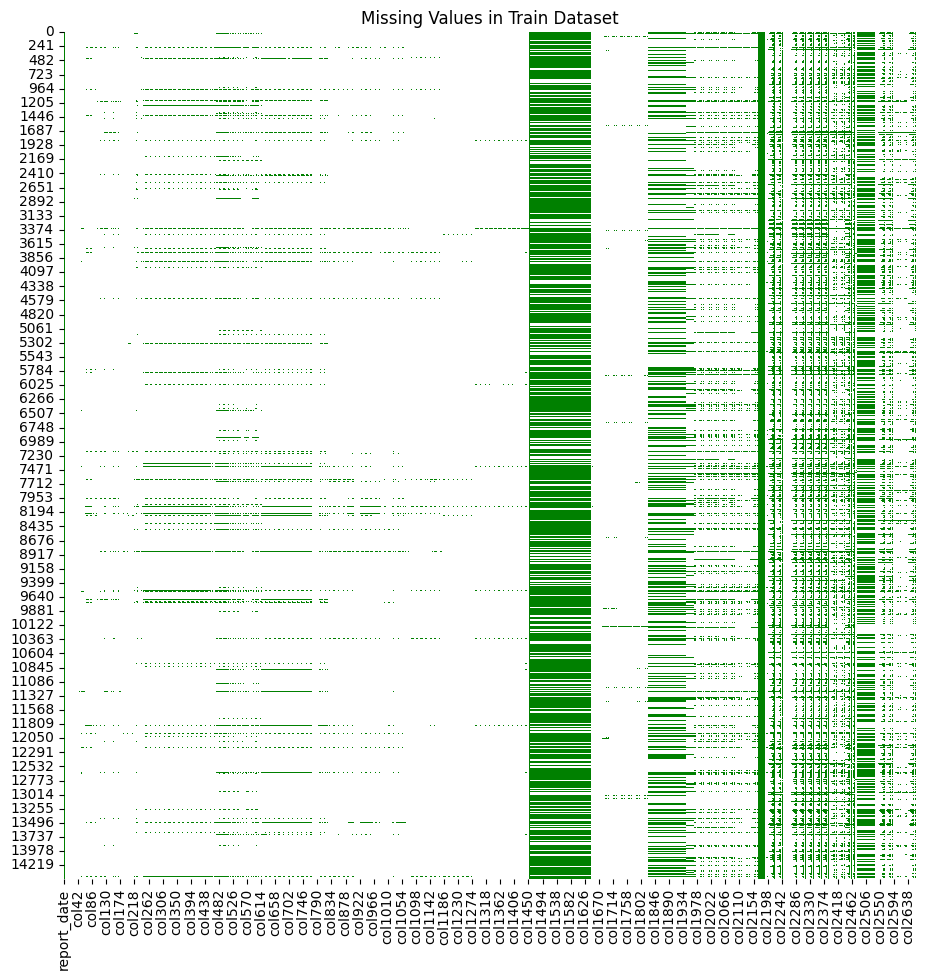

In [158]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(train_data.isnull(), cmap='ocean', cbar = False)
plt.title("Missing Values in Train Dataset")
plt.show()

## Удаление столбцов с малой заполненостью

In [159]:
# Удаление столбцов с более чем 60% пропусков
threshold = 0.60
train_data_filtered = train_data.dropna(axis=1, thresh=int((1 - threshold) * len(train_data)))
print(train_data)

      report_date  client_id  target  col1  col2  col3  col4  col5  col6  \
0      2022-11-01          1       0   NaN   NaN   NaN   NaN   NaN   NaN   
1      2022-11-01          5       0   NaN   NaN   NaN   NaN   NaN   NaN   
2      2022-05-01          6       0   NaN   NaN   NaN   NaN   NaN   NaN   
3      2022-09-01          7       0   NaN   NaN   NaN   NaN   NaN   NaN   
4      2022-08-01          8       0   NaN   NaN   NaN   NaN   NaN   NaN   
...           ...        ...     ...   ...   ...   ...   ...   ...   ...   
14451  2022-07-01       1241       0   NaN   NaN   NaN   NaN   NaN   NaN   
14452  2022-09-01       1969       1   NaN   NaN   NaN   NaN   NaN   NaN   
14453  2022-02-01       7116       1   NaN   NaN   NaN   NaN   NaN   NaN   
14454  2021-08-01       7117       0   NaN   NaN   NaN   NaN   NaN   NaN   
14455  2022-03-01        849       0   NaN   NaN   NaN   NaN   NaN   NaN   

       col7  ...    col2654    col2655    col2656  col2657  col2658  col2659  \
0      

In [160]:
print(train_data_filtered)

      report_date  client_id  target  col1453  \
0      2022-11-01          1       0        0   
1      2022-11-01          5       0        1   
2      2022-05-01          6       0        0   
3      2022-09-01          7       0        0   
4      2022-08-01          8       0        0   
...           ...        ...     ...      ...   
14451  2022-07-01       1241       0        0   
14452  2022-09-01       1969       1        0   
14453  2022-02-01       7116       1        0   
14454  2021-08-01       7117       0        0   
14455  2022-03-01        849       0        0   

                                    col1454  col1455  col1456  col1457  \
0      00f3d719-a6ec-4960-ba01-8372eb705443      0.0      0.0      0.0   
1      01febac0-b083-494e-8589-f98400074b94      0.0      0.0      0.0   
2      0278175e-c0bb-4e1e-bfe5-20db6811d3e2      0.0      0.0      0.0   
3      0364571d-5325-ed11-b823-005056b825cd      1.0      1.0      1.0   
4      065957a6-9b2a-435a-b561-024e9e8d9a

## Удаление повторяющихся данных и пользователей

In [161]:
#Удаление одинаковых данных
data_filtered_no_duplicates = train_data_filtered.loc[:, ~train_data_filtered.T.duplicated()]
print(data_filtered_no_duplicates)

      report_date  client_id  target  col1453  \
0      2022-11-01          1       0        0   
1      2022-11-01          5       0        1   
2      2022-05-01          6       0        0   
3      2022-09-01          7       0        0   
4      2022-08-01          8       0        0   
...           ...        ...     ...      ...   
14451  2022-07-01       1241       0        0   
14452  2022-09-01       1969       1        0   
14453  2022-02-01       7116       1        0   
14454  2021-08-01       7117       0        0   
14455  2022-03-01        849       0        0   

                                    col1454  col1455  col1456  col1457  \
0      00f3d719-a6ec-4960-ba01-8372eb705443      0.0      0.0      0.0   
1      01febac0-b083-494e-8589-f98400074b94      0.0      0.0      0.0   
2      0278175e-c0bb-4e1e-bfe5-20db6811d3e2      0.0      0.0      0.0   
3      0364571d-5325-ed11-b823-005056b825cd      1.0      1.0      1.0   
4      065957a6-9b2a-435a-b561-024e9e8d9a

In [162]:
#Проверка пропусков в столбиках
missing_data = data_filtered_no_duplicates.isnull().sum()
missing_data_filtered = missing_data[missing_data > 0]
print(missing_data_filtered)

col1454       1
col1455    3337
col1456    3337
col1457    3337
col1458    3337
           ... 
col2655    8249
col2656    8249
col2660    6420
col2661    6420
col2662    6420
Length: 186, dtype: int64


In [163]:
# Поиск дублирующихся пользователей и их удаление
data_sorted = data_filtered_no_duplicates.sort_values(by='client_id', ascending=True)
duplicates = data_sorted['client_id'].value_counts()[data_sorted['client_id'].value_counts() > 1].index
duplicates_list = duplicates.tolist()
print("Дублирующиеся значения client_id:", duplicates_list)

data_cleaned = data_sorted[data_sorted.duplicated('client_id', keep='first') == False]
print(data_cleaned)

Дублирующиеся значения client_id: [50, 663, 1559, 49, 806, 615, 2256, 2185, 4645, 434, 3691, 70, 1973, 264, 1750, 766, 105, 2763, 641, 3345, 3070, 2041, 1943, 359, 498, 4383, 1584, 3385, 670, 1542, 897, 2098, 3302, 1695, 258, 1810, 1190, 2883, 491, 2010, 4494, 3462, 401, 1015, 3793, 3785, 197, 3131, 2433, 2371, 2389, 2712, 387, 776, 176, 3585, 1944, 205, 2900, 2368, 276, 1179, 321, 2289, 4784, 588, 4042, 2304, 2817, 595, 291, 613, 568, 1185, 274, 2991, 1491, 559, 2773, 248, 2194, 4916, 3186, 650, 362, 552, 2967, 2974, 2753, 1003, 1435, 1795, 461, 970, 1866, 2476, 2600, 1849, 916, 1276, 844, 1260, 944, 1708, 3544, 990, 32, 1791, 271, 2313, 4418, 2923, 1523, 3286, 1275, 667, 668, 2882, 24, 4127, 113, 4735, 828, 554, 3840, 64, 212, 283, 1859, 4272, 285, 4073, 69, 231, 233, 2323, 1815, 4000, 36, 856, 2892, 6288, 1427, 1133, 255, 42, 850, 2198, 46, 246, 1693, 433, 2564, 4846, 2092, 53, 2180, 3488, 2176, 648, 5453, 526, 2267, 761, 586, 6160, 3654, 1373, 3645, 1764, 3627, 2427, 1448, 1023, 17

In [164]:
#Проверка оставшихся после очистки пропусков
missing_values_after_cleaning = data_cleaned.isnull().sum()
filtered_missing_values_after_cleaning = missing_values_after_cleaning[missing_values_after_cleaning > 0]
filtered_missing_values_after_cleaning

,0
col1454,1
col1455,826
col1456,826
col1457,826
col1458,826
...,...
col2655,2444
col2656,2444
col2660,1900
col2661,1900


## Заполнение пропусков модой

In [183]:
#Заполнение пропусков модой
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':
        mode_value = data_cleaned[column].mode()[0]
    else:
        mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)
print(data_cleaned.isnull().sum())

<ipython-input-183-ca2efb64ddda>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].fillna(mode_value, inplace=True)
<ipython-input-183-ca2efb64ddda>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column].fillna(mode_value, inplace=True)
<ipython-input-183-ca2efb64ddda>:6: FutureWarning: A value is trying to b

report_date    0
client_id      0
target         0
col1453        0
col1454        0
              ..
col2656        0
col2660        0
col2661        0
col2662        0
col2663        0
Length: 191, dtype: int64


<Axes: >

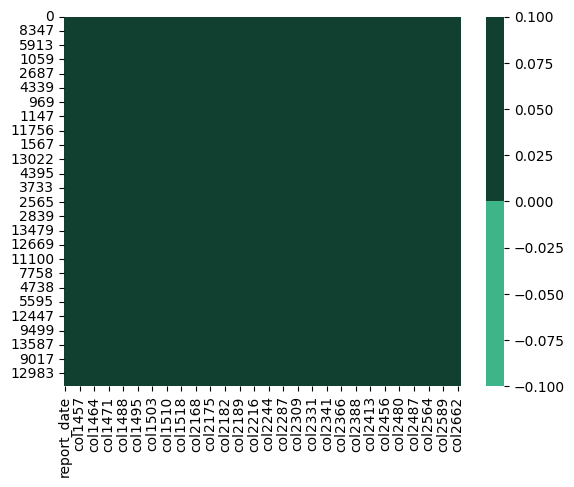

In [166]:
#Визуализация пропусков
count_of_ones = data_cleaned['target'].sum()
data_columns = data_cleaned.columns
color_palette = ['#3eb489', '#114031']
sns.heatmap(data_cleaned[data_columns].isnull(), cmap=sns.color_palette(color_palette))

In [167]:
# Проверка количества данных в файле
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 14446
Columns: 191 entries, report_date to col2663
dtypes: float64(186), int64(3), object(2)
memory usage: 7.1+ MB


## Кодирование данных

In [184]:
label_encoder = LabelEncoder()
for column in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])

print(data_cleaned.head(5))

      report_date  client_id  target  col1453  col1454  col1455  col1456  \
0              21          1       0        0       14      0.0      0.0   
4102           21          2       0        1       17      0.0      0.0   
8786           17          5       0        0       32      0.0      0.0   
2              15          6       0        0       39      0.0      0.0   
4105           21          7       0        1       59      0.0      0.0   

      col1457  col1458  col1459  ...  col2588  col2589  col2590    col2654  \
0         0.0      0.0      0.0  ...    360.0    360.0    360.0  3000000.0   
4102      0.0      0.0      1.0  ...    240.0    240.0    240.0  4941670.0   
8786      0.0      0.0      1.0  ...    362.0    362.0    362.0  7616803.0   
2         0.0      0.0      1.0  ...    360.0    360.0    360.0  3000000.0   
4105      0.0      1.0      1.0  ...    360.0    360.0    360.0  8035085.0   

        col2655    col2656    col2660    col2661    col2662   col2663  
0 

In [185]:
#Вывод столбцов с низкой корелляцией
low_correlation_threshold = 0.1
low_corr_columns = data_cleaned.columns[(data_cleaned.abs() < low_correlation_threshold).all()]
low_corr_data = data_cleaned[low_corr_columns]
print(low_corr_data)

       col1471  col1479  col1503  col1511  col1520  col1521  col1522  col2503
0          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0
4102       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0
8786       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0
2          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0
4105       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0
...        ...      ...      ...      ...      ...      ...      ...      ...
14368      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0
14391      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0
14417      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0
14434      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0
14446      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0

[4817 rows x 8 columns]


In [186]:
#Удаление столбцов с низкой корелляцией
columns_to_exclude = ['col1471', 'col1479', 'col1503', 'col1511', 'col1520', 'col1521', 'col1522', 'col2503']
final_cleaned_data = data_cleaned.drop(columns=columns_to_exclude, axis=1)
final_cleaned_data.head()

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,21,1,0,0,14,0.0,0.0,0.0,0.0,0.0,...,360.0,360.0,360.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,0.256261
4102,21,2,0,1,17,0.0,0.0,0.0,0.0,1.0,...,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
8786,17,5,0,0,32,0.0,0.0,0.0,0.0,1.0,...,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,15,6,0,0,39,0.0,0.0,0.0,0.0,1.0,...,360.0,360.0,360.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,0.256261
4105,21,7,0,1,59,0.0,0.0,0.0,1.0,1.0,...,360.0,360.0,360.0,8035085.0,8035085.0,8035085.0,8035085.0,8035085.0,8035085.0,0.258682


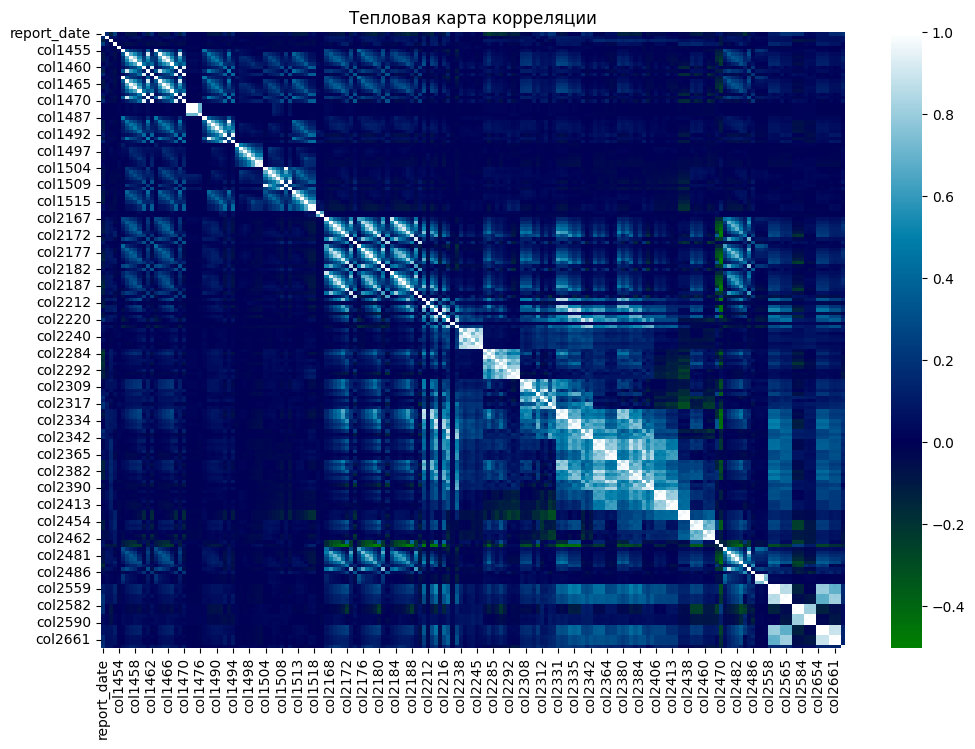

In [187]:
#Визуализация таблицы зависимостей
correlation_matrix = final_cleaned_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='ocean')
plt.title('Карта корреляции')
plt.show()

## Обработка данных Train под данные Valid

In [189]:
#Сравнение и удаление колонок Train в Valid
train_set = set(final_cleaned_data)
valid_set = set(valid_data)

train_set = final_cleaned_data.copy()
valid_set = valid_data.copy()

train_set.columns = train_set.columns.str.strip().str.lower()
valid_set.columns = valid_set.columns.str.strip().str.lower()

train_columns = set(train_set.columns)
test_columns = set(valid_set.columns)

columns_to_remove = list(test_columns - train_columns)
cleaned_valid_data = valid_set.drop(columns=columns_to_remove, axis=1)
cleaned_valid_data.head()

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,0,01016bd5-10dc-ec11-b823-005056b825cd,0.0,0.0,0.0,0.0,0.0,...,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,0,0151dccf-0ecb-ed11-b828-005056b81dee,0.0,0.0,1.0,1.0,1.0,...,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,0,074ce8a6-859a-4084-a1c6-41343a94a856,0.0,0.0,0.0,0.0,0.0,...,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,0,08e72a9b-74fd-450a-982e-a8cede3facb3,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,0,0a033230-3889-4239-8900-0ffb7e48958c,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348


<Axes: >

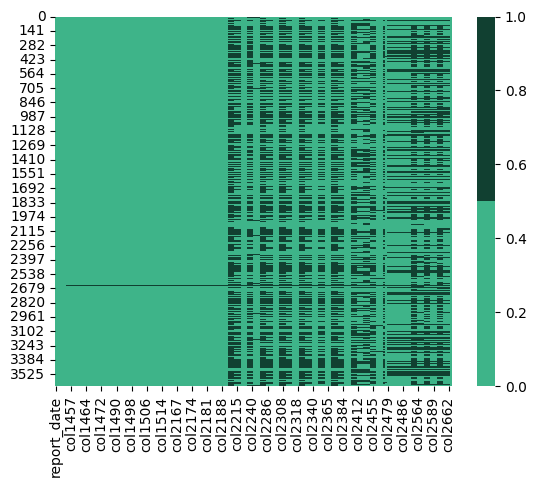

In [174]:
#Проверка пропусков в Valid
validation_columns = cleaned_valid_data.columns
sns.heatmap(cleaned_valid_data[validation_columns].isnull(), cmap=sns.color_palette(color_palette))

<Axes: >

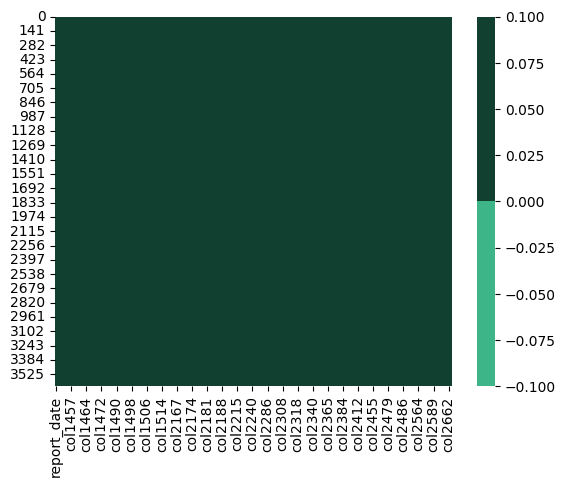

In [175]:
#Заполенние данных Valid медианой
final_valid_data = cleaned_valid_data.fillna(cleaned_valid_data.median(numeric_only=True))

validation_columns = final_valid_data.columns
sns.heatmap(final_valid_data[validation_columns].isnull(), cmap=sns.color_palette(color_palette))

In [191]:
#Сравнение 1 в колонке цель с их общим количеством
target_column = 'target'

count_of_ones_in_target = final_valid_data[target_column].sum()
total_rows_in_target = final_valid_data[target_column].count()
percentage_of_ones = (count_of_ones_in_target / total_rows_in_target) * 100

print(f"Количество 1 в колонке '{target_column}': {count_of_ones_in_target}")
print(f"Процент 1 в колонке '{target_column}' по сравнению с общим: {percentage_of_ones:.2f}%")

Количество 1 в колонке 'target': 66
Процент 1 в колонке 'target' по сравнению с общим: 1.81%


In [177]:
# Кодировка финальных данных
label_encoder = LabelEncoder()
for column in final_valid_data.select_dtypes(include=['object']).columns:
    final_valid_data[column] = label_encoder.fit_transform(final_valid_data[column])

print(final_valid_data.head())

   report_date  client_id  target  col1453  col1454  col1455  col1456  \
0            1          2       0        0       16      0.0      0.0   
1            2          4       0        0       18      0.0      0.0   
2            2          9       0        0       93      0.0      0.0   
3            0         12       0        0      108      0.0      0.0   
4            0         14       0        0      120      0.0      0.0   

   col1457  col1458  col1459  ...  col2588  col2589  col2590     col2654  \
0      0.0      0.0      0.0  ...    240.0    240.0    240.0   4941670.0   
1      1.0      1.0      1.0  ...    360.0    360.0    360.0  11789500.0   
2      0.0      0.0      0.0  ...    348.0    348.0    348.0   7000000.0   
3      0.0      0.0      0.0  ...    300.0    300.0    300.0   7737230.5   
4      0.0      0.0      0.0  ...    362.0    362.0    362.0   7737230.5   

      col2655     col2656     col2660     col2661     col2662   col2663  
0   4941670.0   4941670.0   49

In [178]:
#Сокращение названий конечных обработанных данных
finval = final_valid_data
fincled = final_cleaned_data

In [192]:
#Построение модели
X_train = fincled.drop(columns='target')
y_train = fincled['target']

X_test = finval.drop(columns='target')
y_test = finval['target']
model = LogisticRegression(random_state=4, max_iter=4000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

Точность модели: 0.98
ROC-AUC: 0.51


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Модели

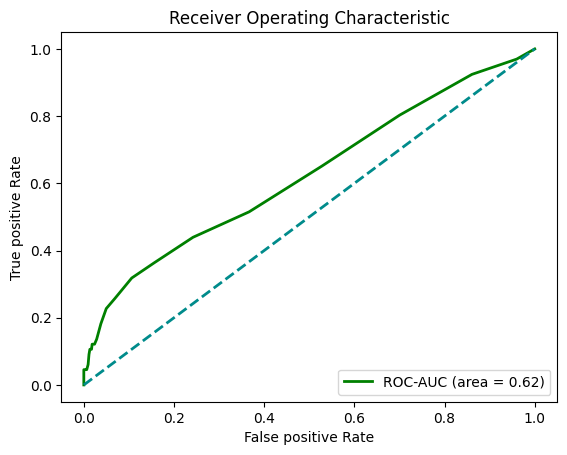

In [180]:
#RandomForestClassifier
RFC_model = RandomForestClassifier(class_weight="balanced", random_state=42)
RFC_model.fit(X_train, y_train)

y_pred = RFC_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_prob = RFC_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC-AUC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkcyan', lw=2, linestyle='--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristic(RandomForestClassifier)')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


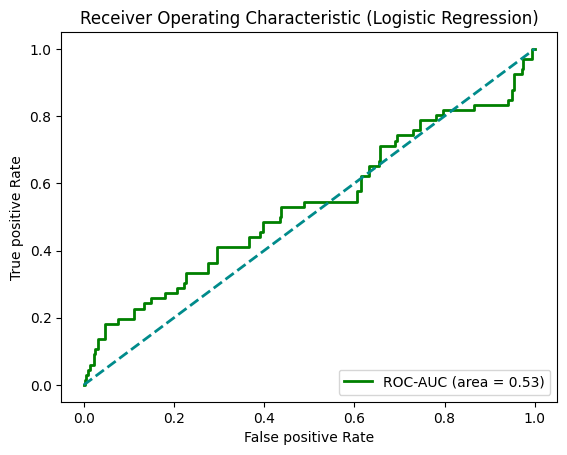

In [181]:
#LogisticRegression
logreg_model = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)


y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_prob = logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC-AUC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkcyan', lw=2, linestyle='--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

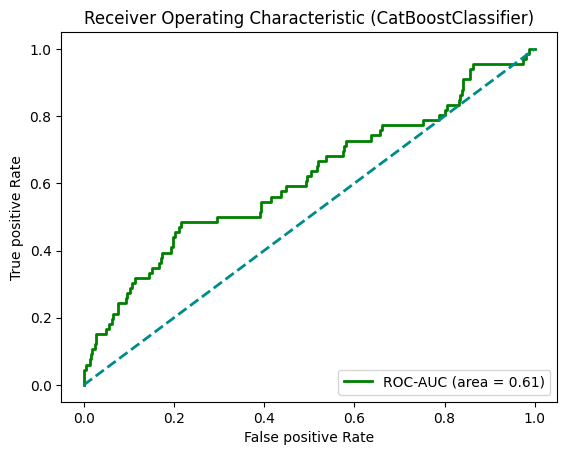

In [193]:
#CatBoostClassifier
catboost_model = CatBoostClassifier(class_weights=[1, 12], random_seed=42, verbose=0)  # verbose=0 to suppress training output
catboost_model.fit(X_train, y_train)


y_pred = catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_prob = catboost_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC-AUC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkcyan', lw=2, linestyle='--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristic (CatBoostClassifier)')
plt.legend(loc='lower right')
plt.show()